#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-23 02:07:35--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-04-23 02:07:36 (4.77 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Read the Data
insurance_data=pd.read_csv("insurance.csv")


In [ ]:
#printing first 5 rows of data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#List of categorical and numerica columns
Numerical_column = insurance_data.select_dtypes(include = "number").columns.to_list
Categorical_column = insurance_data.select_dtypes(exclude = "number").columns.to_list
print(f"Numerical column in the data : {Numerical_column}")
print(f"Categorical column in the data : {Categorical_column}")

Numerical column in the data : <bound method IndexOpsMixin.tolist of Index(['age', 'bmi', 'children', 'charges'], dtype='object')>
Categorical column in the data : <bound method IndexOpsMixin.tolist of Index(['sex', 'smoker', 'region'], dtype='object')>


##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
# statistical measure of Numerical column
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#statistical measure of Categorical column
insurance_data.describe(exclude="number")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Null check
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

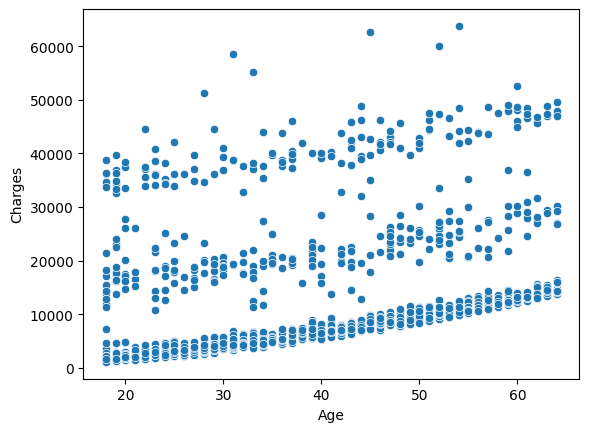

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge
sns.scatterplot(x = "age", y= "charges", data = insurance_data)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

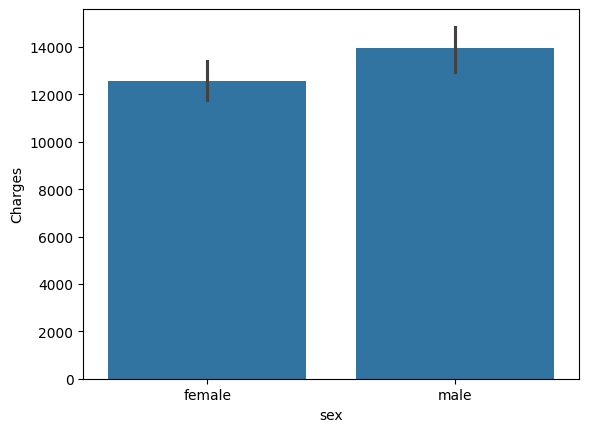

In [ ]:
# sex vs charges
# males insurance charges more than females.
sns.barplot(x = "sex", y= "charges", data = insurance_data)
plt.xlabel("sex")
plt.ylabel("Charges")
plt.show()

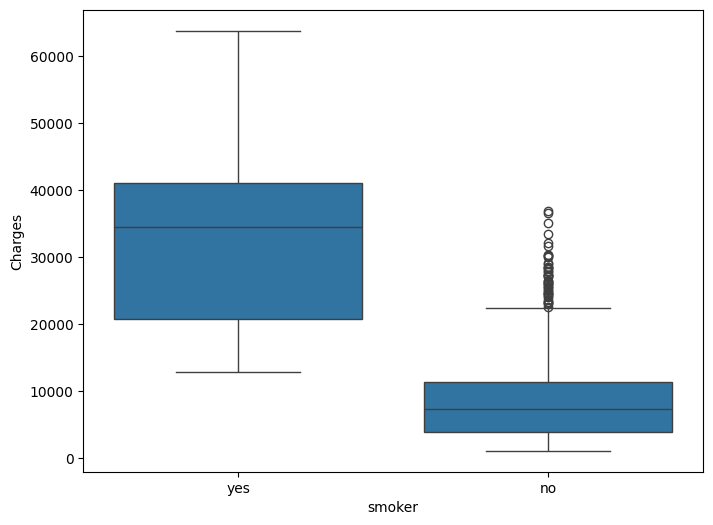

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize=(8, 6))
sns.boxplot(x = "smoker", y= "charges", data = insurance_data)
plt.xlabel("smoker")
plt.ylabel("Charges")
plt.show()

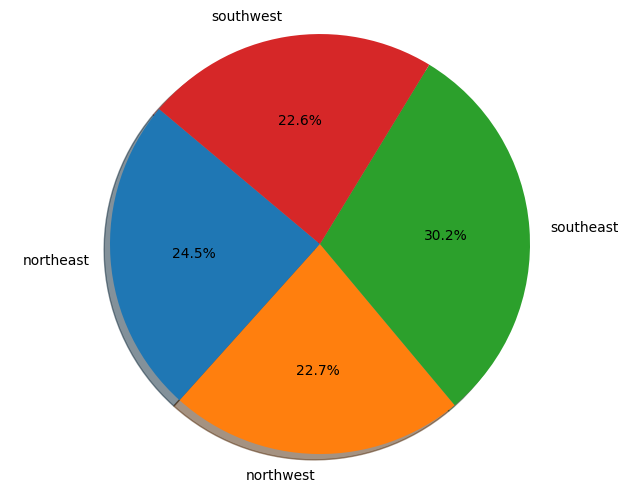

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges
region_charges = insurance_data.groupby("region")["charges"].sum()

plt.figure(figsize=(8, 6))
plt.pie(region_charges,labels=region_charges.index, shadow=True, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.show()

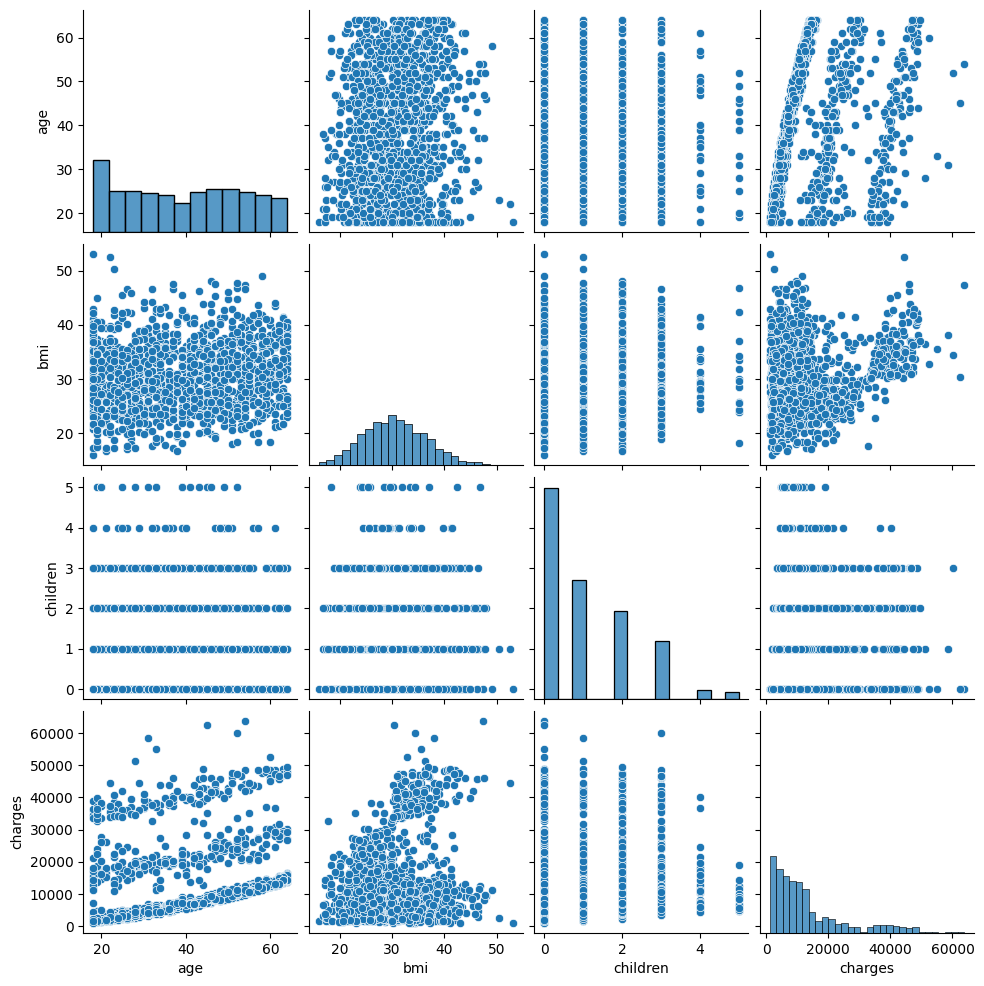

In [ ]:
#pairplot of the insurance claim dataset
#showing relationship between all pairs of numerical variables
sns.pairplot(insurance_data)
plt.show()

In [ ]:
Numerical_column = insurance_data.select_dtypes(include=["int64", "float64"]).columns
numeric_data = insurance_data[Numerical_column]

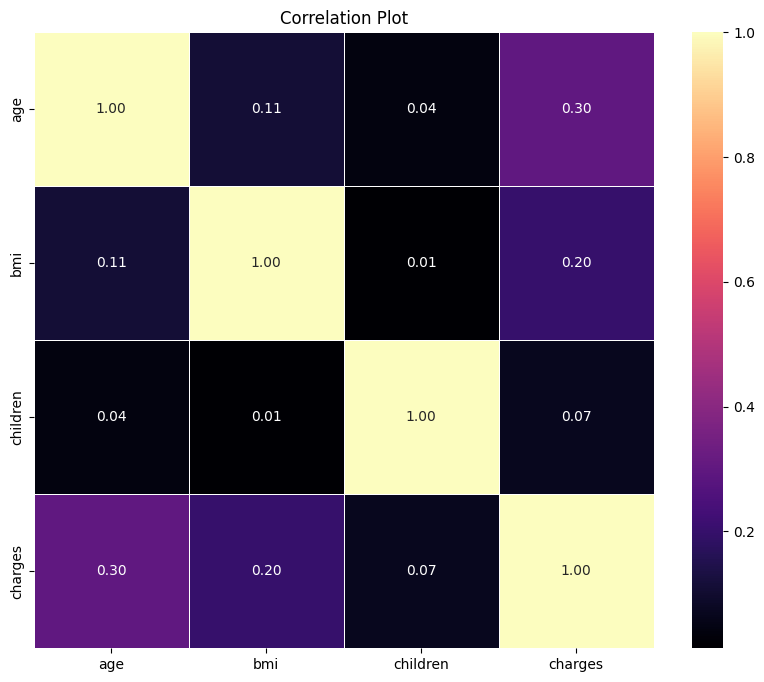

In [ ]:
# plotting the correlation plot for the dataset
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".2f", linewidth=.5)
plt.title("Correlation Plot")
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'sex' column
insurance_data['sex_encoded'] = label_encoder.fit_transform(insurance_data['sex'])

# Encode 'smoker' column
insurance_data['smoker_encoded'] = label_encoder.fit_transform(insurance_data['smoker'])

# Display the first few rows of the dataset with encoded columns
print(insurance_data[['sex', 'sex_encoded', 'smoker', 'smoker_encoded']].head())



      sex  sex_encoded smoker  smoker_encoded
0  female            0    yes               1
1    male            1     no               0
2    male            1     no               0
3    male            1     no               0
4    male            1     no               0


In [ ]:
# removing unnecassary columns from the dataset
insurance_data.drop(["region","sex","smoker"], axis=1, inplace=True)
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded'], dtype='object')

In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
X = insurance_data.drop(["charges"],axis=1)
Y = insurance_data[["charges"]]

In [ ]:
print(X)

      age     bmi  children  sex_encoded  smoker_encoded
0      19  27.900         0            0               1
1      18  33.770         1            1               0
2      28  33.000         3            1               0
3      33  22.705         0            1               0
4      32  28.880         0            1               0
...   ...     ...       ...          ...             ...
1333   50  30.970         3            1               0
1334   18  31.920         0            0               0
1335   18  36.850         0            0               0
1336   21  25.800         0            0               0
1337   61  29.070         0            0               1

[1338 rows x 5 columns]


Splitting the dataset into the Training set and Test set

In [ ]:
print(Y)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
#spit the dataset into training and the tesing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 5) (1070, 5) (268, 5)


In [ ]:
print(X_train)
print(Y_train)

      age     bmi  children  sex_encoded  smoker_encoded
560    46  19.950         2            0               0
1285   47  24.320         0            0               0
1142   52  24.860         0            0               0
969    39  34.320         5            0               0
486    54  21.470         3            0               0
...   ...     ...       ...          ...             ...
1095   18  31.350         4            0               0
1130   39  23.870         5            0               0
1294   58  25.175         0            1               0
860    37  47.600         2            0               1
1126   55  29.900         0            1               0

[1070 rows x 5 columns]
          charges
560    9193.83850
1285   8534.67180
1142  27117.99378
969    8596.82780
486   12475.35130
...           ...
1095   4561.18850
1130   8582.30230
1294  11931.12525
860   46113.51100
1126  10214.63600

[1070 rows x 1 columns]


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# creating the model
# feeding the training data to the model
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
# predicting the test set results
Y_pred = model.predict(X_test)

In [ ]:
# calculating the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE) :", mse)

Mean Squared Error (MSE) : 33979257.05080821


In [ ]:
# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squred Error (RMSE) :", rmse)

Root Mean Squred Error (RMSE) : 5829.17293025419


In [ ]:
# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score :", r2 )

R-squared Score : 0.7811302113434095


    Accuracy : 78.11

##Support Vector Machine

In [ ]:
from sklearn.svm import SVR
# creating the model
svm_model = SVR(kernel="linear")

# feeding the training data to the model
svm_model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
# predicting the test set results
Y_pred = svm_model.predict(X_test)

In [ ]:
# calculating the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE) :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squred Error (RMSE) :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score :", r2 )

Mean Squared Error (MSE) : 166101112.85731974
Root Mean Squred Error (RMSE) : 12888.022069243974
R-squared Score : -0.06990318865259981


     Accuracy : 69.90

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# creating the model
dt_model = DecisionTreeRegressor(random_state=42)
# feeding the training data to the model
dt_model.fit(X_train, Y_train)



DecisionTreeRegressor(random_state=42)

In [ ]:
# predicting the test set results
Y_pred = dt_model.predict(X_test)

In [ ]:
# calculating the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE) :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squred Error (RMSE) :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score :", r2 )

Mean Squared Error (MSE) : 43579367.62333527
Root Mean Squred Error (RMSE) : 6601.467081136985
R-squared Score : 0.7192932450746337


        Accuracy : 71.93

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# creating the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# feeding the training data to the model
rf_model.fit(X_train, Y_train)



<ipython-input-46-f50f4653e92c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# predicting the test set results
Y_pred = rf_model.predict(X_test)

In [ ]:
# calculating the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE) :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squred Error (RMSE) :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score :", r2 )

Mean Squared Error (MSE) : 22057921.54633006
Root Mean Squred Error (RMSE) : 4696.586158725299
R-squared Score : 0.8579188291306657


          Accuracy : 85.79

Compare and evaluate the Model results and find the best model

By comparing the MeanSquared Error(MSE) and R-squared score for each model,
we can determine which one performs best on the insurance claim dataset. Lower MSE and higher R-squred values indicate better model performance.

HERE
     
           Model                    MSE                 R-squared score
     
     Linear Regression        33979257.05080821       0.7811302113434095

     Support Vector Machine   166101112.85731974      -0.06990318865259981

     Decision Tree            43579367.62333527       0.7192932450746337

     Random Forest            22057921.54633006       0.8579188291306657


Based on these metrics, the Random Forest model has the lowest Mean Squared Error (MSE) and the highest R-squared score, indicating better performance compared to the other models. The Linear Regression model also performs reasonably well, with a lower MSE compared to the Decision Tree and SVM models.

It's important to note that the R-squared score for the SVM model is negative, which suggests that the model performs worse than a horizontal line fitting the data. This indicates poor model fit or overfitting.

Therefore, based on the provided metrics, the Random Forest model appears to be the best-performing model for this insurance claim dataset, followed by Linear Regression.




    
    
     